In [30]:
%load_ext pycodestyle_magic
%flake8_on

In [84]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import missingno as msno

from Preprocessing import timer, one_hot_encoder, \
    application_train, bureau_and_balance, previous_applications, \
    pos_cash, installments_payments, credit_card_balance, kfold_lightgbm, \
    display_importances, preprocess_total

from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

Train samples: 307511
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 16s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 23s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 13s
Installments payments df shape: (339587, 26)
Process installments payments - done in 29s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 21s
Starting LightGBM. Train shape: (206029, 797), test shape: (101478, 797)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.805374	training's binary_logloss: 0.232632	valid_1's auc: 0.768097	valid_1's binary_logloss: 0.246634
[400]	training's auc: 0.831837	training's binary_logloss: 0.221337	valid_1's auc: 0.777545	valid_1's binary_logloss: 0.242847
[600]	training's auc: 0.850003	training's binary_logloss: 0.213749	valid_1's auc: 0.780233	valid_1's binary_logloss: 

[800]	training's auc: 0.86479	training's binary_logloss: 0.207376	valid_1's auc: 0.789532	valid_1's binary_logloss: 0.239179
[1000]	training's auc: 0.877047	training's binary_logloss: 0.201835	valid_1's auc: 0.790248	valid_1's binary_logloss: 0.238928
Fold  9 AUC : 0.790242
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.804493	training's binary_logloss: 0.233394	valid_1's auc: 0.774032	valid_1's binary_logloss: 0.240524
[400]	training's auc: 0.831408	training's binary_logloss: 0.222005	valid_1's auc: 0.784788	valid_1's binary_logloss: 0.236371
[600]	training's auc: 0.849173	training's binary_logloss: 0.214443	valid_1's auc: 0.787852	valid_1's binary_logloss: 0.235163
[800]	training's auc: 0.863541	training's binary_logloss: 0.208336	valid_1's auc: 0.788782	valid_1's binary_logloss: 0.23471
[1000]	training's auc: 0.876059	training's binary_logloss: 0.202813	valid_1's auc: 0.788858	valid_1's binary_

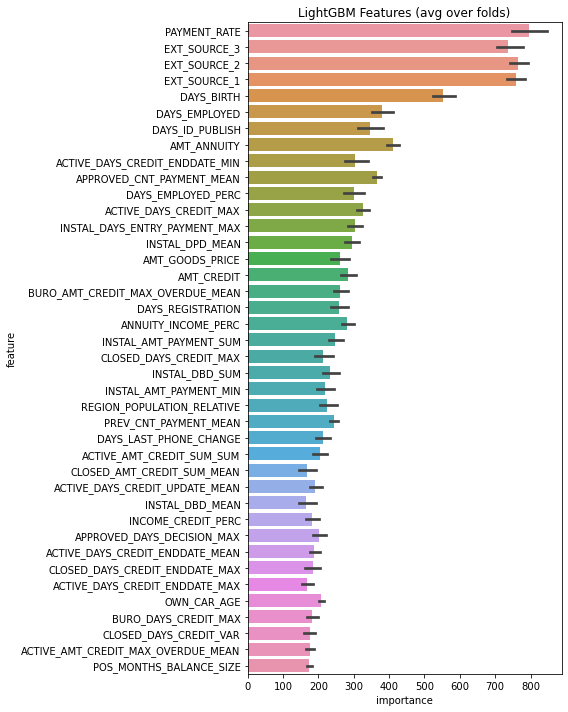

In [2]:
preprocess_total()

In [ ]:
La fonction précédente a réalisé tout un travail de feature engineering puis 

In [57]:
def TraitementValeursManquantes(df, threshold=0.60):
    # thresh est le taux de valeurs manquantes au-dessus
    # duquel on supprime la colonne
    liste_colonnes = df.columns.to_list()
    msno.bar(df, color="darkblue")
    plt.show()

    taux_remp = 100*(1-df.isnull().sum().sum()
                     / (df.shape[0]*train_df_best40.shape[1]))
    print('Le dataset présente un taux de remplissage de '
          + str(round(taux_remp)) + '%.')

    print('Taille du dataset :', df.shape)
    N = (1-threshold) * df.shape[0]
    df.dropna(thresh=N, inplace=True, axis='columns')
    col_suppr = [col for col in liste_colonnes if col not in df.columns]
    print('Colonnes supprimées :', col_suppr)
    print('Taille du dataset après suppression des colonnes',
          'trop peu remplies :', df.shape)
    df.dropna(inplace=True)
    print('Taille du dataset après suppression des lignes ayant',
          'des valeurs manquantes:', df.shape)
    return df

In [58]:
df_best40 = pd.read_csv('df_best40.csv')
print(df_best40.shape)
df_best40.head()

(307507, 41)


,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,EXT_SOURCE_1,...,APPROVED_DAYS_DECISION_MAX,APPROVED_CNT_PAYMENT_MEAN,POS_MONTHS_BALANCE_SIZE,INSTAL_DPD_MEAN,INSTAL_DBD_MEAN,INSTAL_DBD_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,TARGET
0,296505.0,23904.0,247500.0,0.007274,-15441,-1089.0,-3544.0,-4006,8.0,0.425905,...,-635.0,12.0,13.0,0.857143,5.071429,71.0,381.420,184403.025,-274.0,0
1,2025000.0,77130.0,2025000.0,0.009334,-14913,-2052.0,-4399.0,-4423,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,288873.0,14179.5,238500.0,0.003813,-21789,NaN,-1508.0,-4151,NaN,0.544829,...,-356.0,24.0,11.0,0.000000,11.545455,127.0,10464.390,115108.290,-32.0,0
3,506889.0,19237.5,418500.0,0.022625,-21631,-3801.0,-11390.0,-5121,7.0,NaN,...,-305.0,20.0,39.0,0.196078,8.764706,447.0,3123.810,847355.895,-23.0,0
4,343800.0,10921.5,225000.0,0.007274,-22672,-776.0,-8376.0,-4166,NaN,NaN,...,-177.0,15.0,12.0,1.062500,8.812500,141.0,50.625,139841.370,-26.0,0


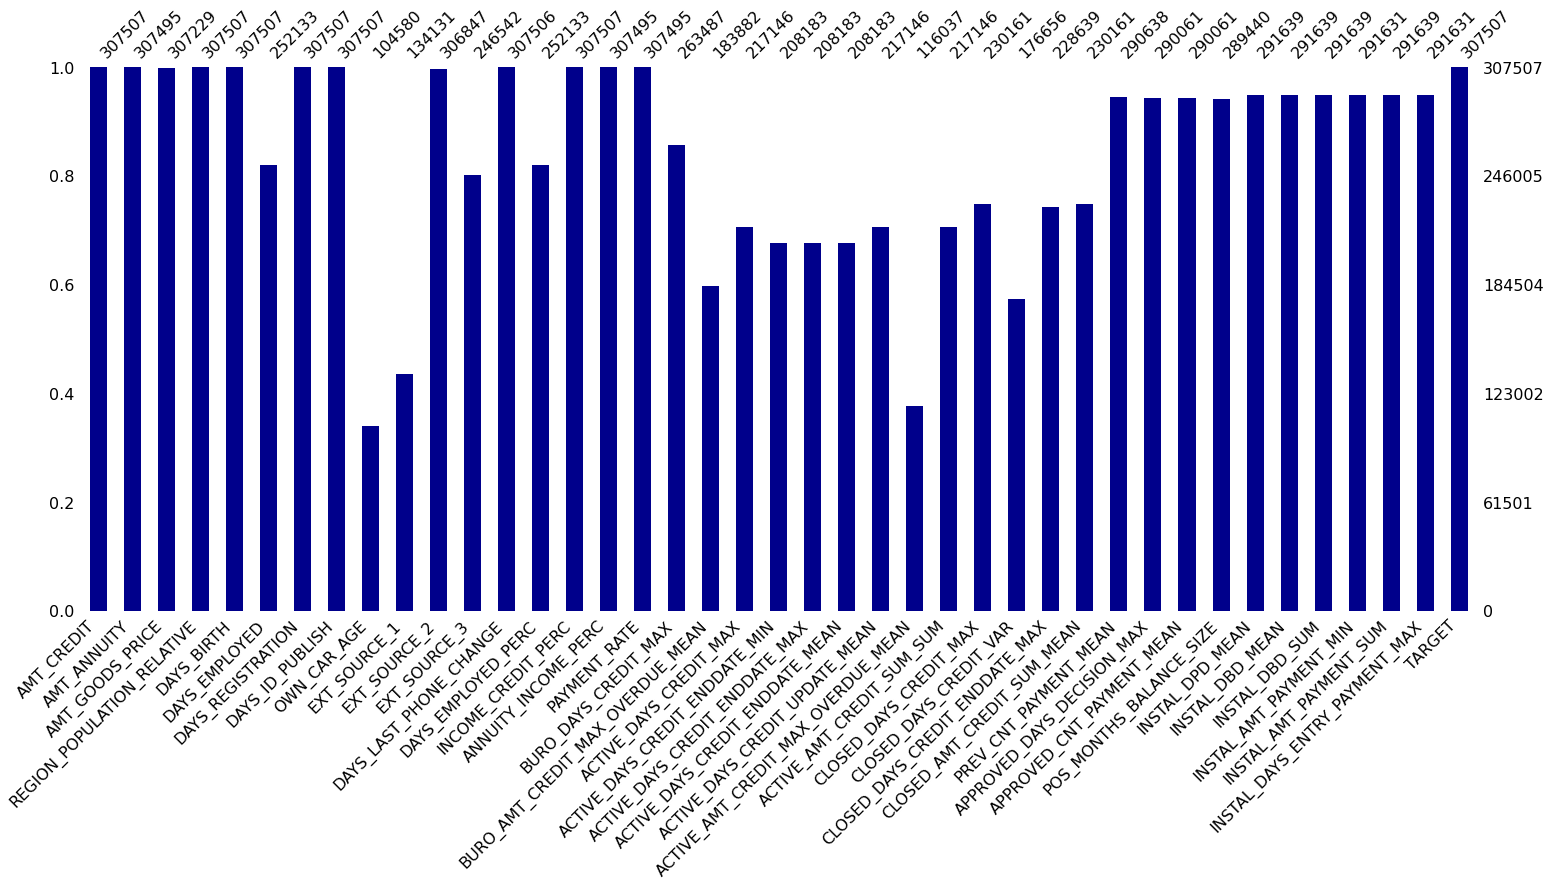

Le dataset présente un taux de remplissage de 83%.
Taille du dataset : (307507, 41)
Colonnes supprimées : ['OWN_CAR_AGE', 'ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN']
Taille du dataset après suppression des colonnes trop peu remplies : (307507, 39)
Taille du dataset après suppression des lignes ayant des valeurs manquantes: (46783, 39)


In [59]:
df_best40 = TraitementValeursManquantes(df_best40)

In [60]:
df_best80 = pd.read_csv('df_best80.csv')
print(df_best80.shape)
df_best80.head()

(307507, 81)


,CODE_GENDER,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_AMT_INSTALMENT_MAX,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,TARGET
0,0,296505.0,23904.0,247500.0,0.007274,-15441,-1089.0,-3544.0,-4006,8.0,...,2195.511429,15368.580,381.420,13171.644643,184403.025,-274.0,-453.928571,-6355.0,NaN,0
1,0,2025000.0,77130.0,2025000.0,0.009334,-14913,-2052.0,-4399.0,-4423,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0,288873.0,14179.5,238500.0,0.003813,-21789,NaN,-1508.0,-4151,NaN,...,0.000000,10464.390,10464.390,10464.390000,115108.290,-32.0,-187.545455,-2063.0,NaN,0
3,0,506889.0,19237.5,418500.0,0.022625,-21631,-3801.0,-11390.0,-5121,7.0,...,884.100000,34648.920,3123.810,16614.821471,847355.895,-23.0,-478.078431,-24382.0,0.4,0
4,1,343800.0,10921.5,225000.0,0.007274,-22672,-776.0,-8376.0,-4166,NaN,...,3046.789688,16268.535,50.625,8740.085625,139841.370,-26.0,-167.562500,-2681.0,NaN,0


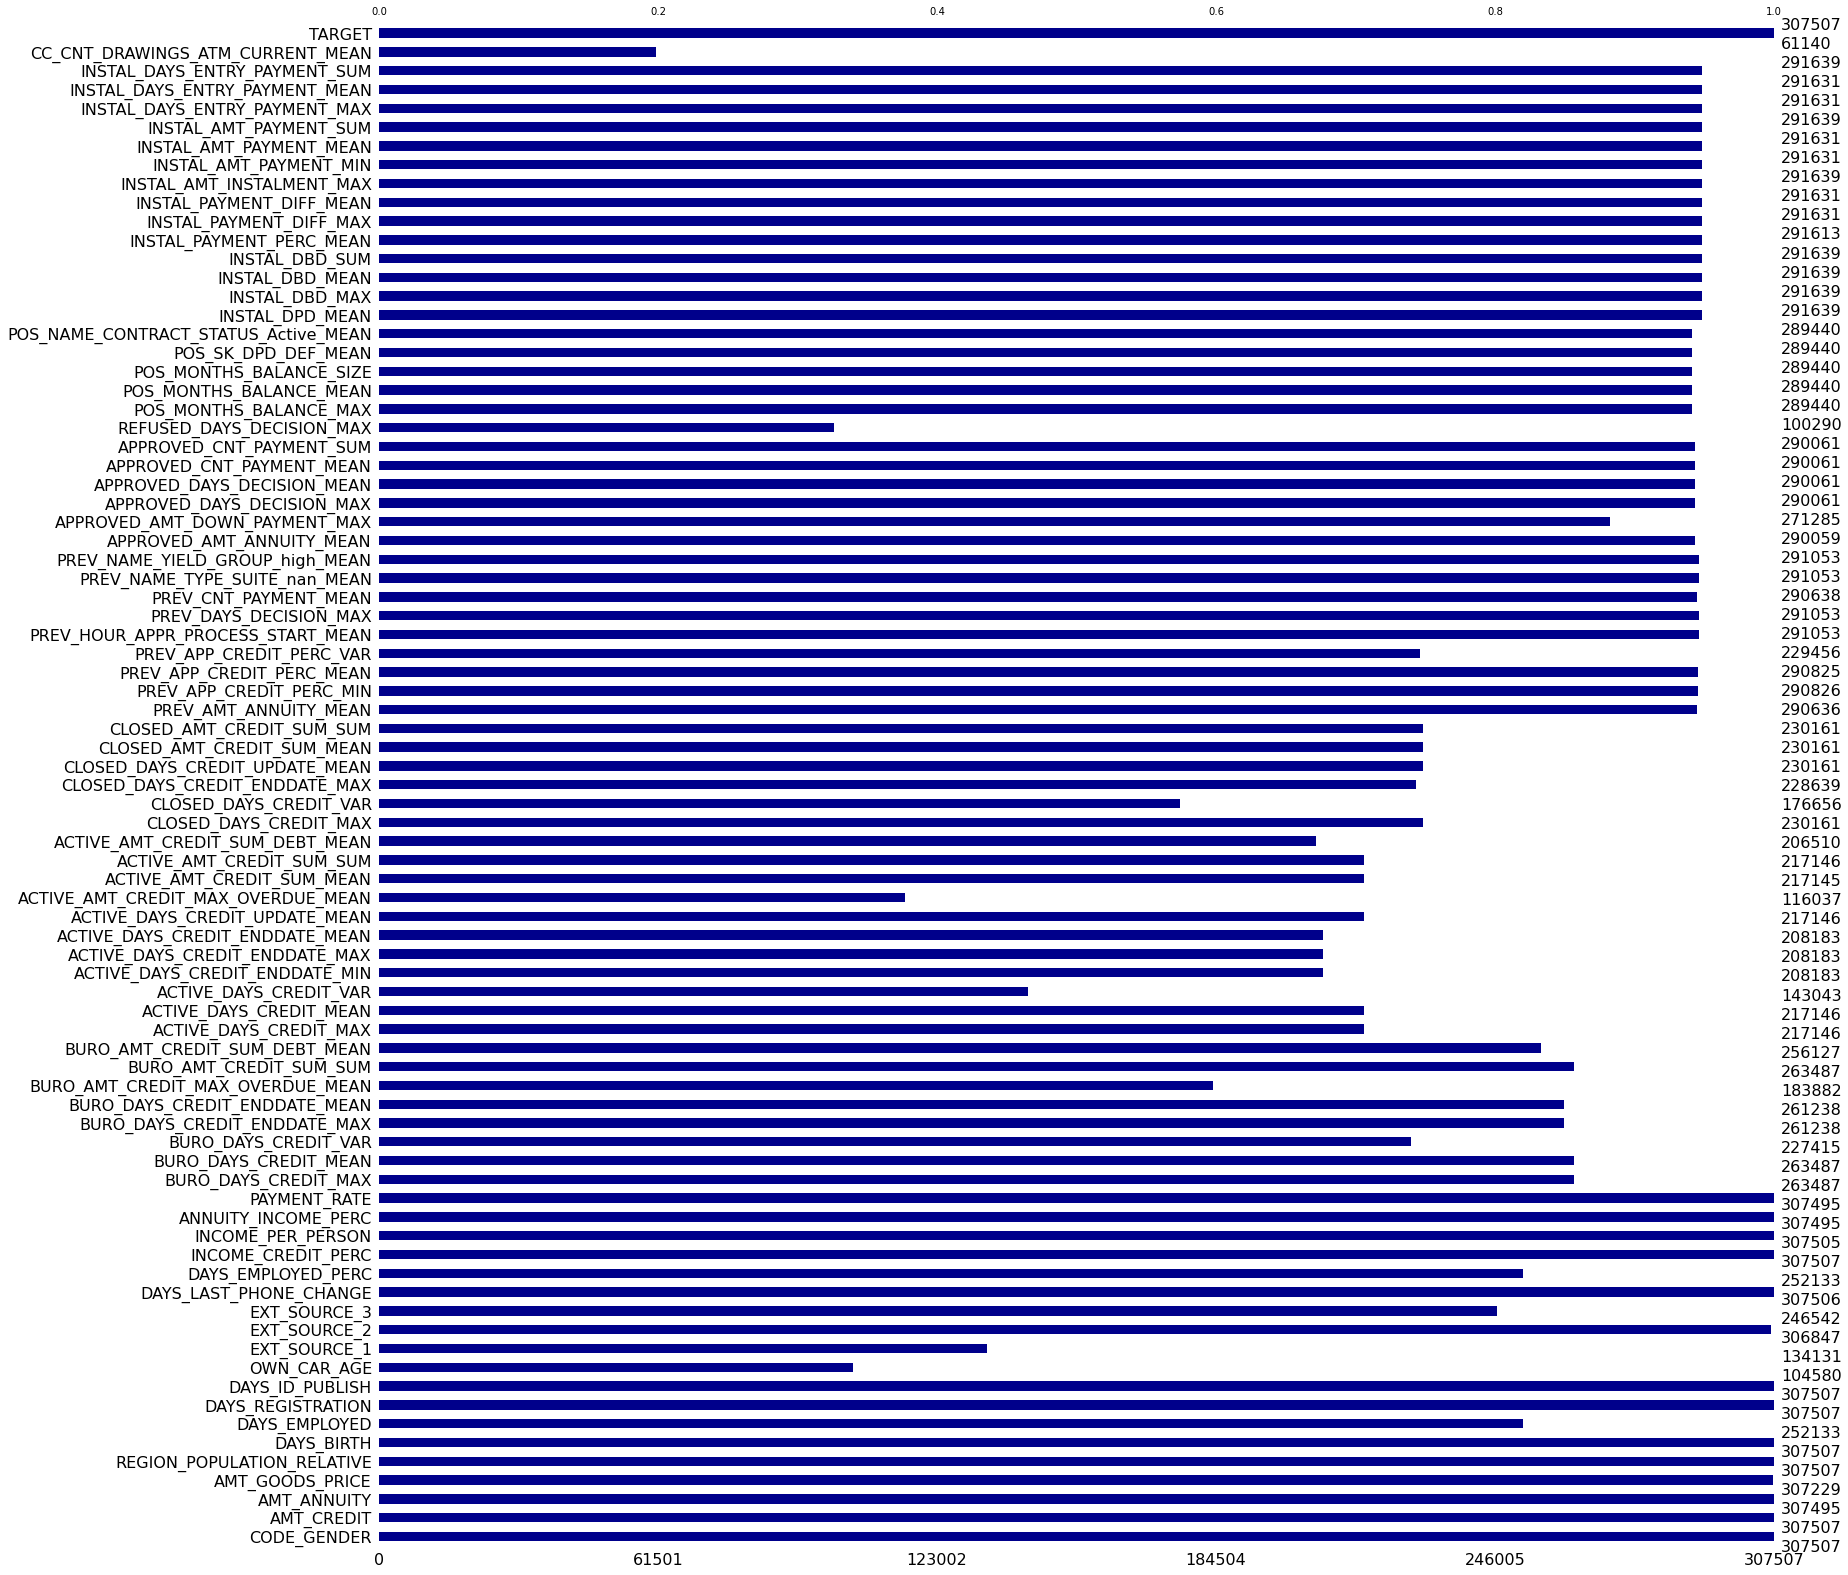

Le dataset présente un taux de remplissage de 68%.
Taille du dataset : (307507, 81)
Colonnes supprimées : ['OWN_CAR_AGE', 'ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN', 'REFUSED_DAYS_DECISION_MAX', 'CC_CNT_DRAWINGS_ATM_CURRENT_MEAN']
Taille du dataset après suppression des colonnes trop peu remplies : (307507, 77)
Taille du dataset après suppression des lignes ayant des valeurs manquantes: (30022, 77)


In [61]:
df_best80 = TraitementValeursManquantes(df_best80)

Vérifions que nous n'avons pas de doublons.

In [63]:
print('Dans le fichier avec les 40 meilleurs variables :',
      df_best40[df_best40.duplicated()].shape[0], 'doublons.')

print('Dans le fichier avec les 80 meilleurs variables :',
      df_best80[df_best80.duplicated()].shape[0], 'doublons.')

Dans le fichier avec les 40 meilleurs variables : 0 doublons.
Dans le fichier avec les 80 meilleurs variables : 0 doublons.


Nous choisissons de travailler avec le fichier qui contient les 40 meilleurs variables.

In [64]:
df = df_best40

### Analyse exploratoire

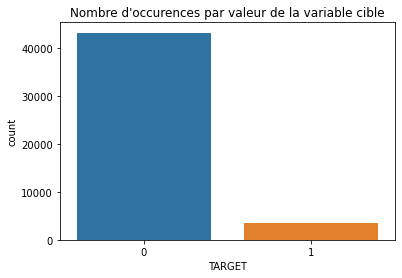

In [68]:
sns.countplot(x='TARGET', data=df)
plt.title('Nombre d\'occurences par valeur de la variable cible')
plt.show()

La variable ```TARGET``` est notre variable cible. Elle vaut 1 lorsque le client a des difficultés de paiement (il a payé en retard d'au moins X jours au moins une fois dans les Y premiers remboursements du prêt) et 0 sinon.

In [71]:
def decrit_variable(df, colonne):
    df = df.dropna(subset=[colonne])
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # Boxplot
    sns.boxplot(df[colonne], ax=axes[0])
    plt.sca(axes[0])
    plt.title(colonne, fontsize=20)
    plt.xlabel('Valeurs de la variable', fontsize=15)
    plt.tick_params(axis='x', which='major')
    plt.tick_params(axis='y', which='major')

    # Histogramme
    sns.distplot(df[colonne], ax=axes[1])
    plt.sca(axes[1])
    plt.title(colonne, fontsize=20)
    plt.xlabel('Valeurs de la variable', fontsize=15)
    plt.ylabel('Densité', fontsize=15)
    plt.tick_params(axis='x', which='major')
    plt.tick_params(axis='y', which='major')

    plt.show()

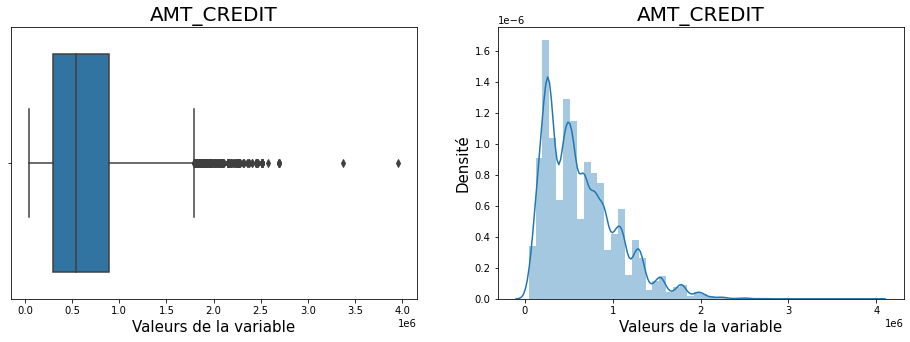

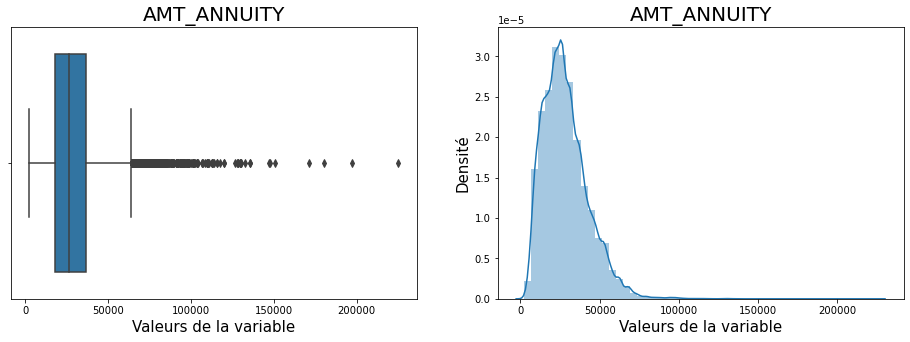

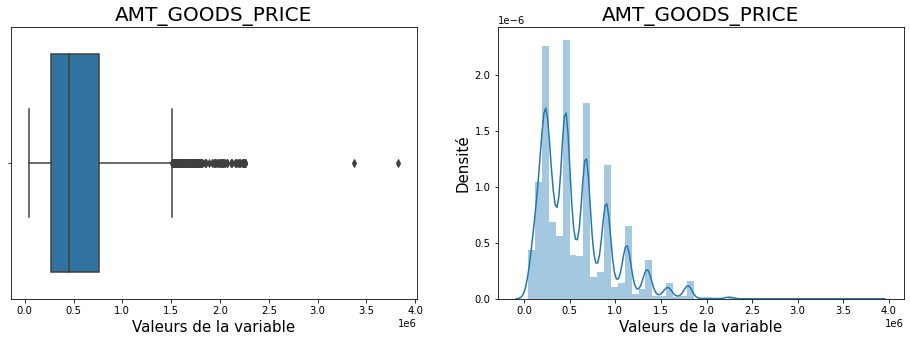

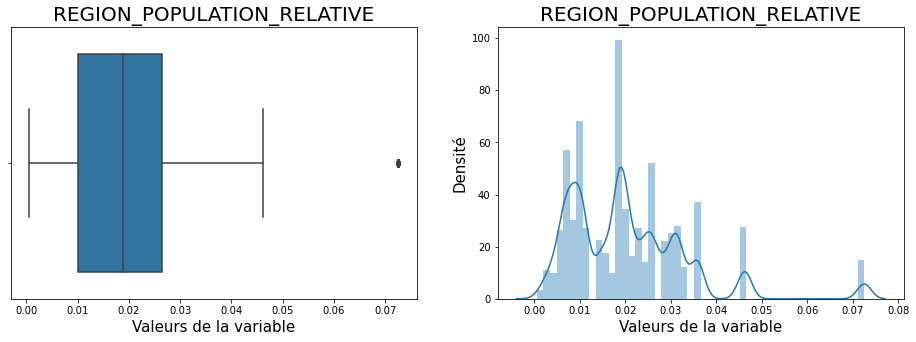

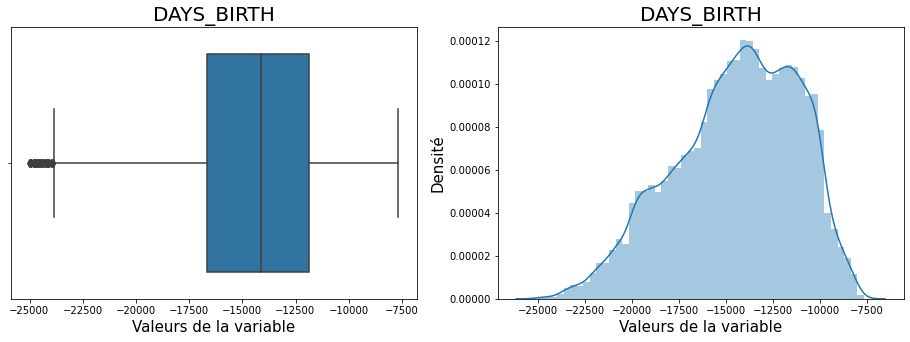

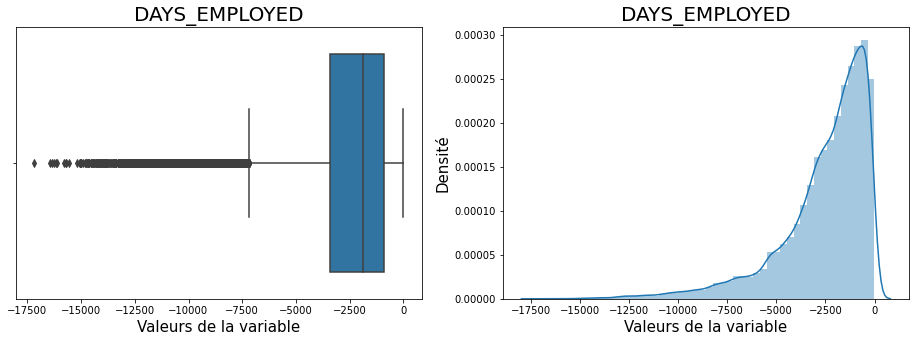

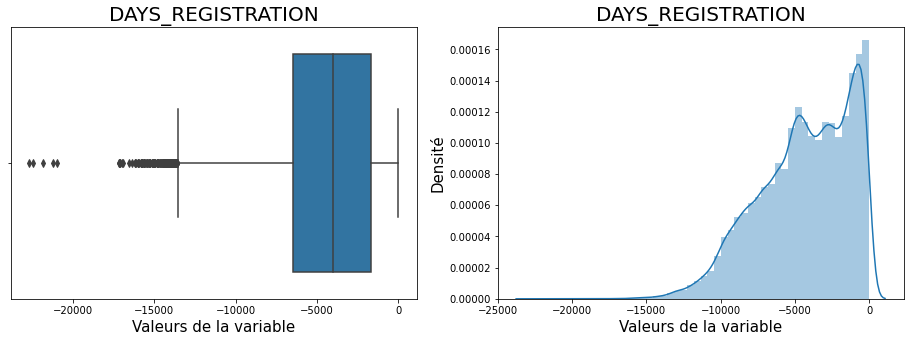

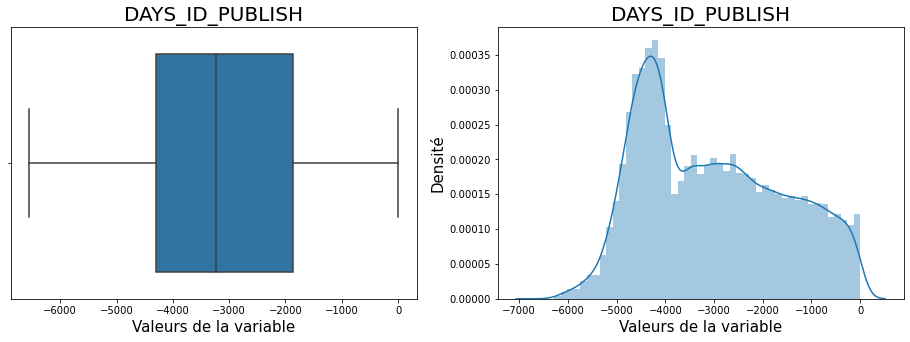

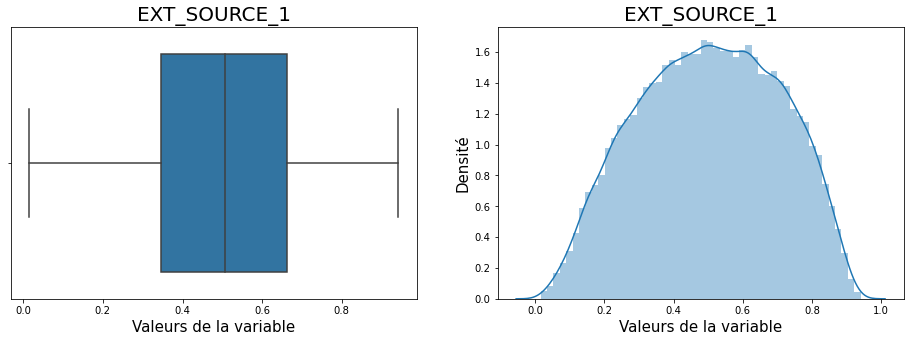

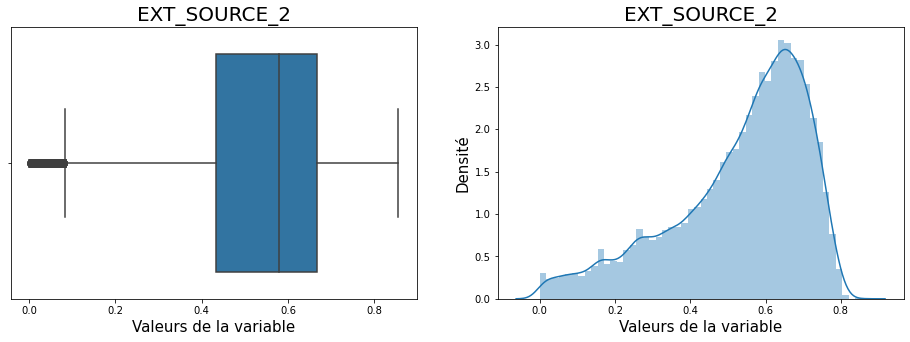

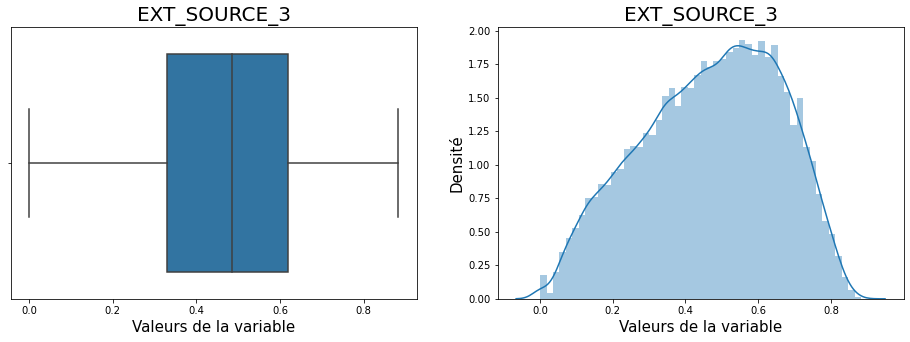

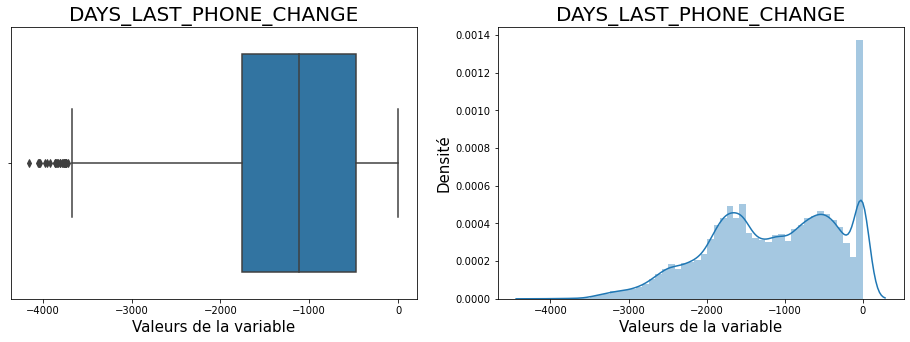

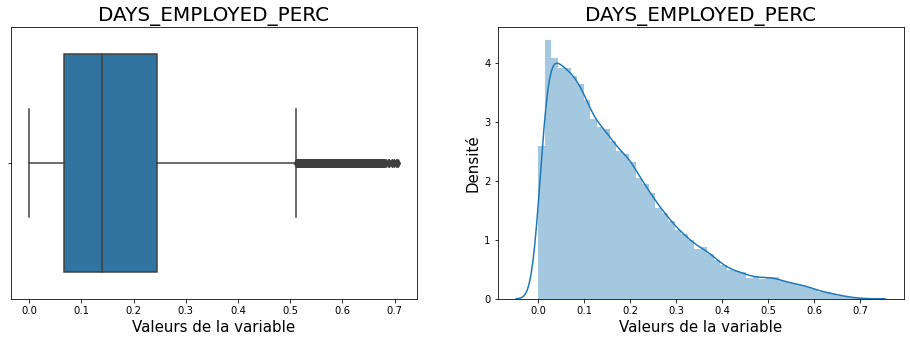

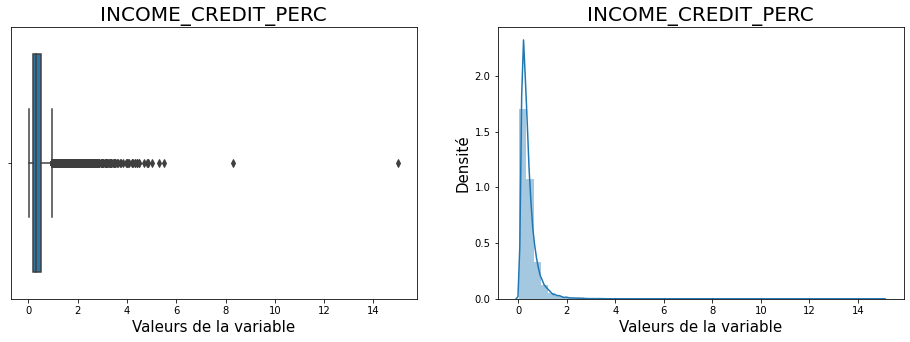

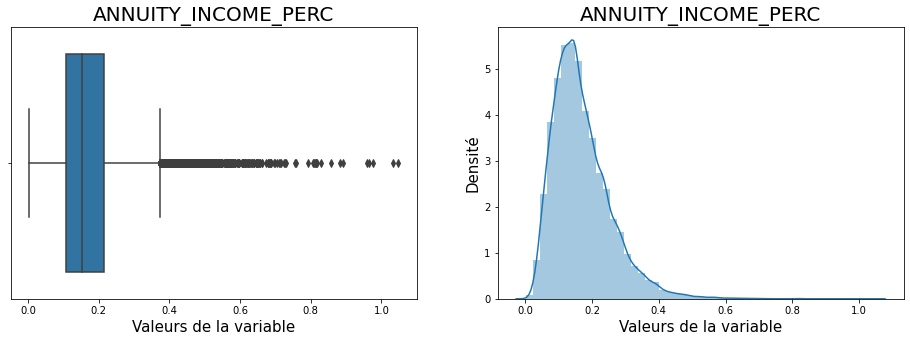

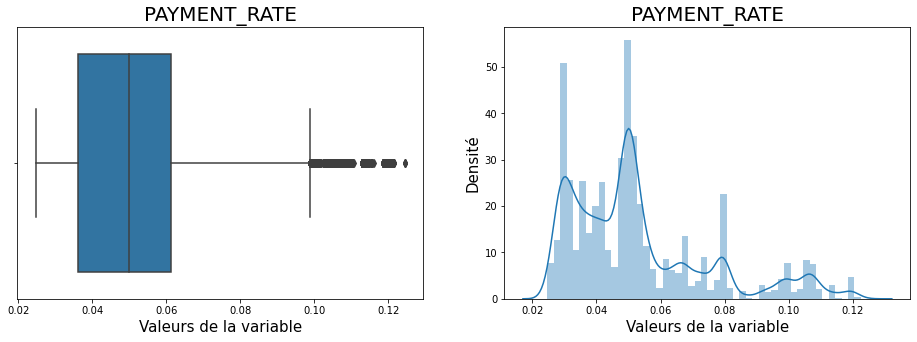

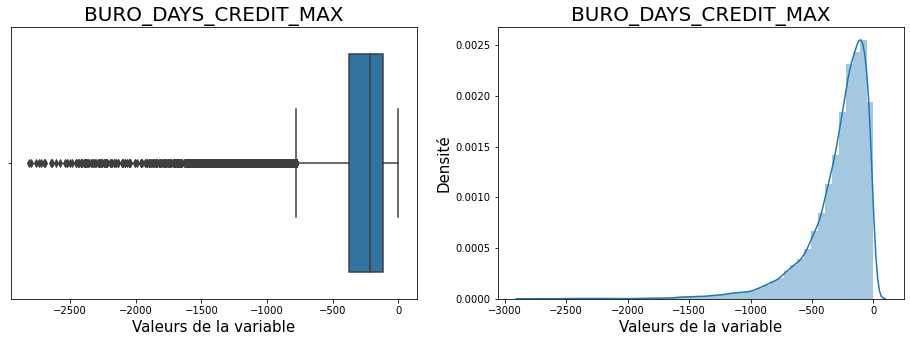

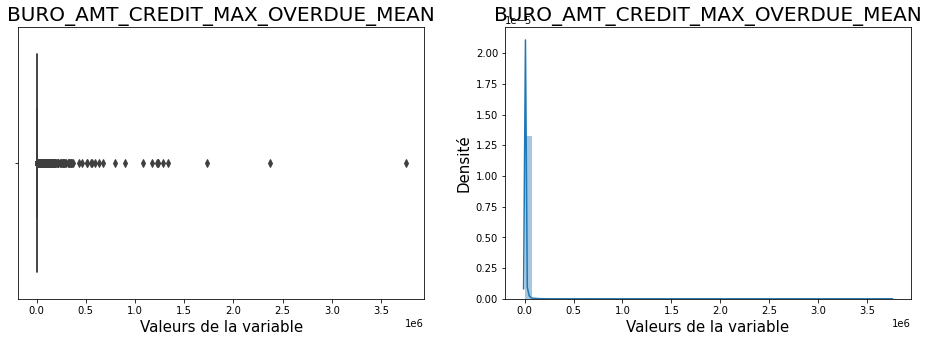

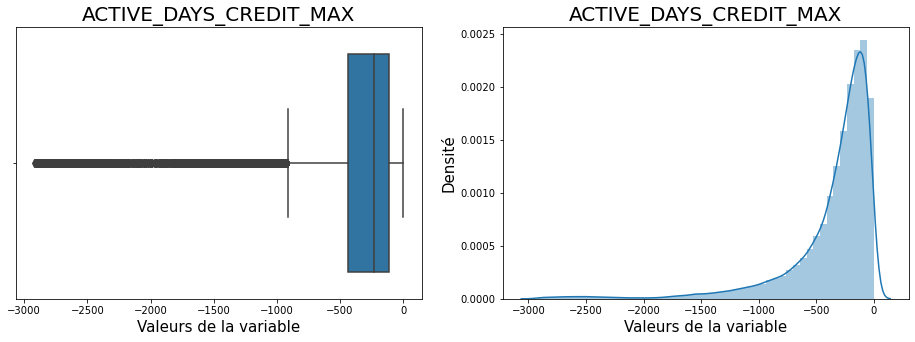

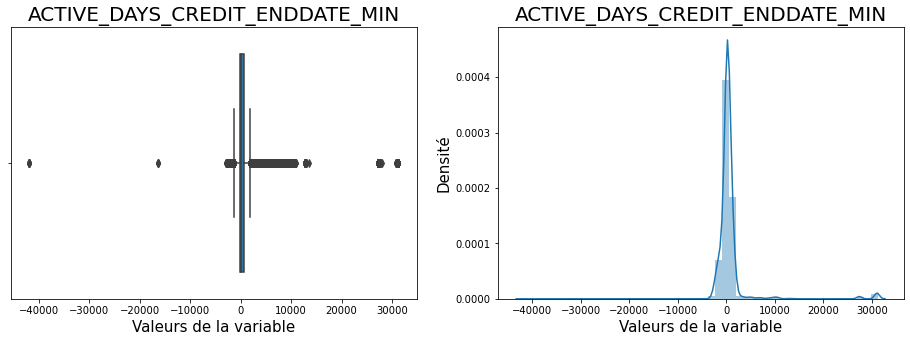

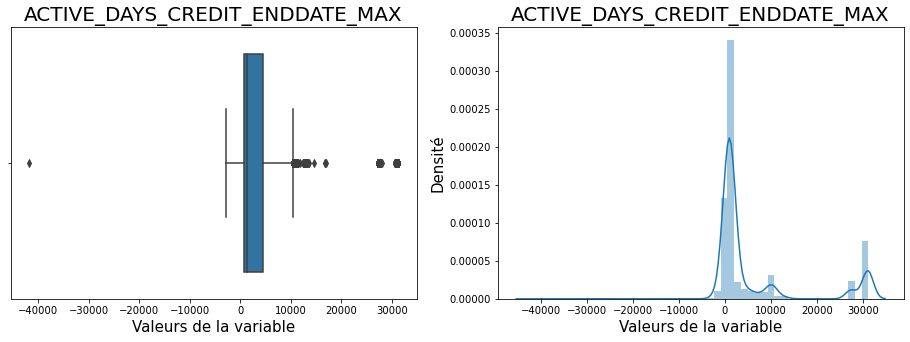

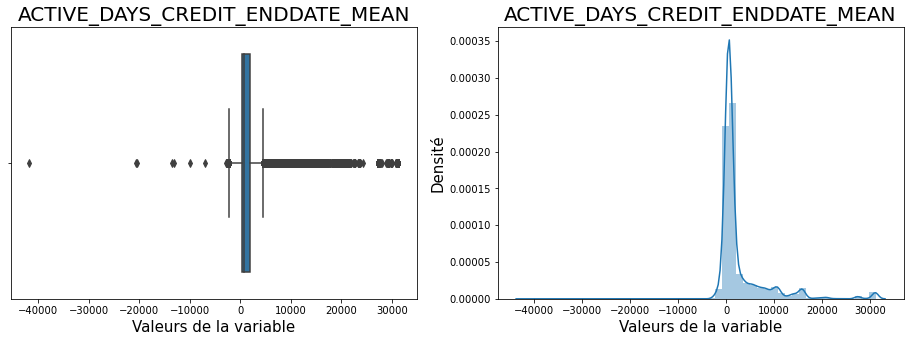

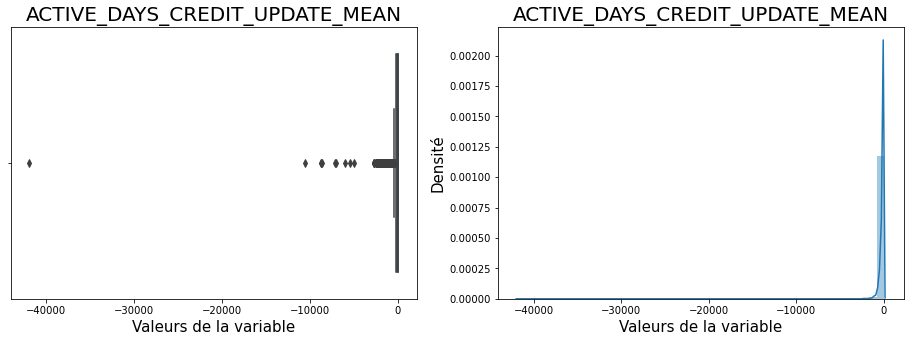

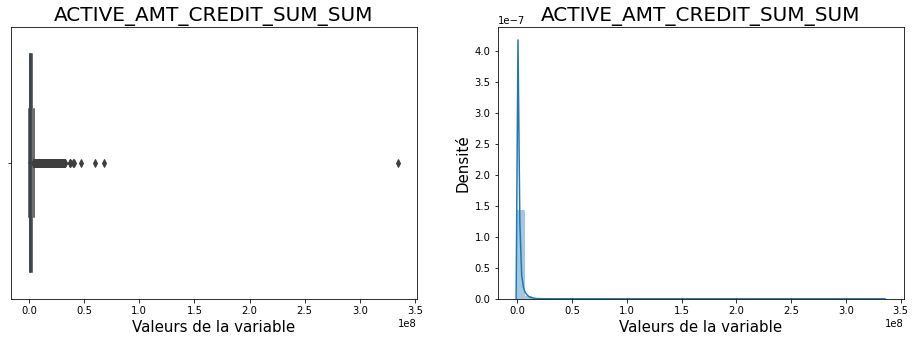

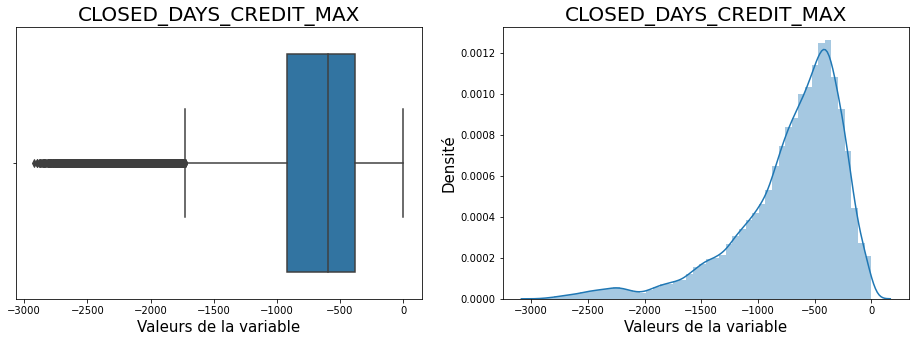

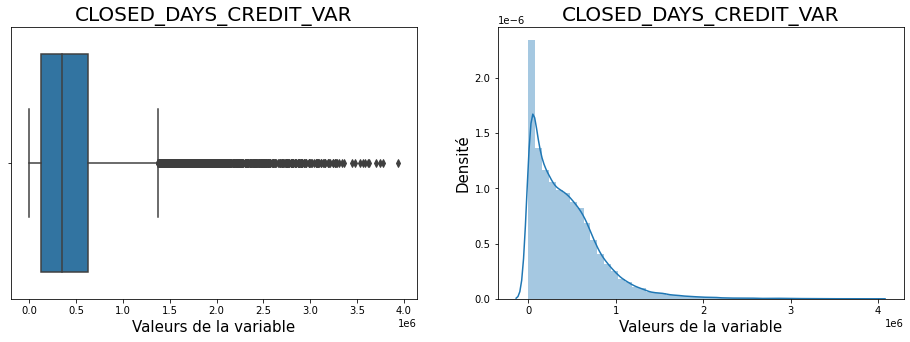

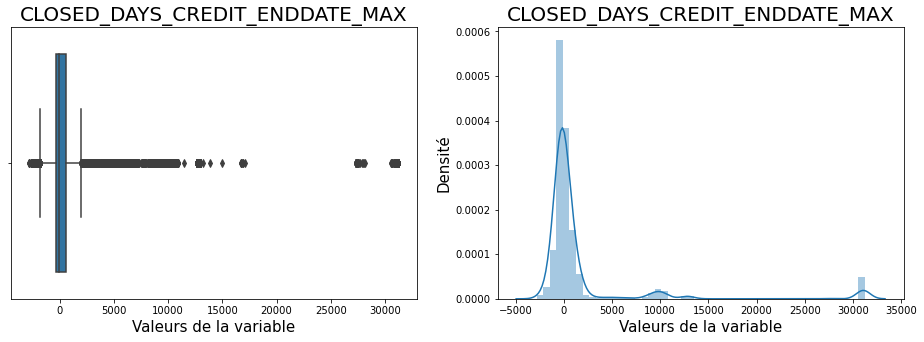

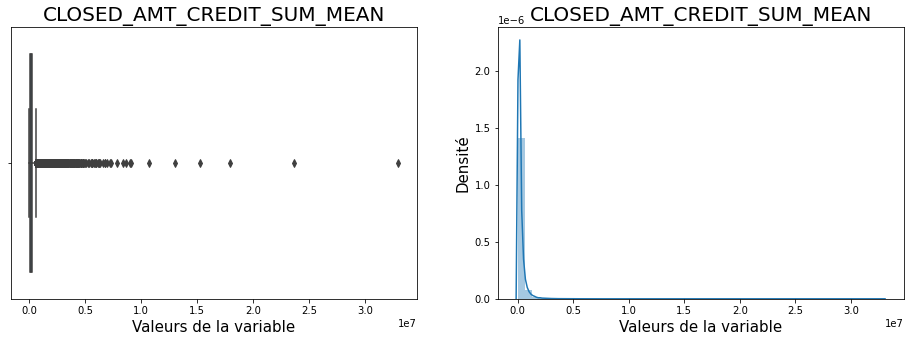

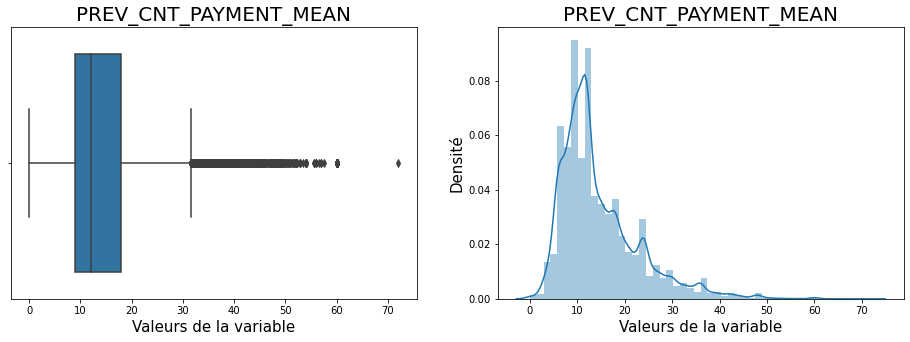

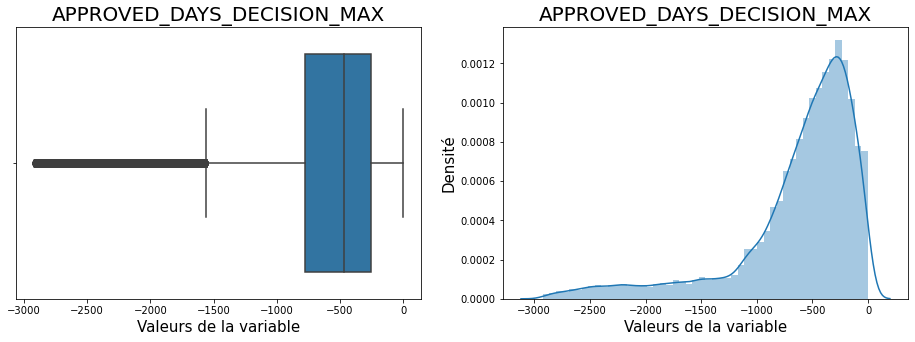

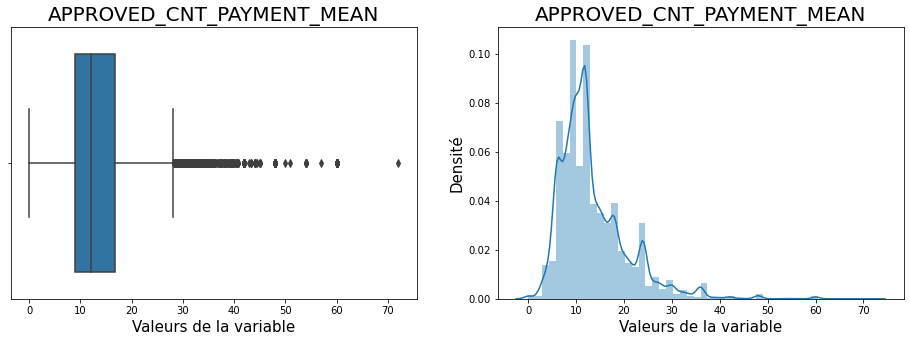

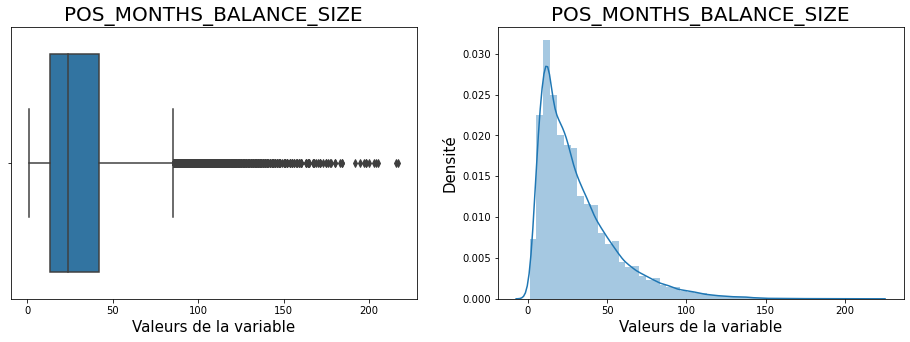

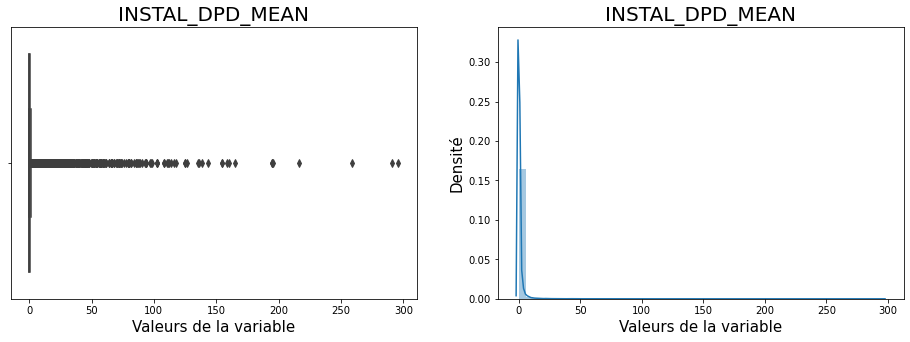

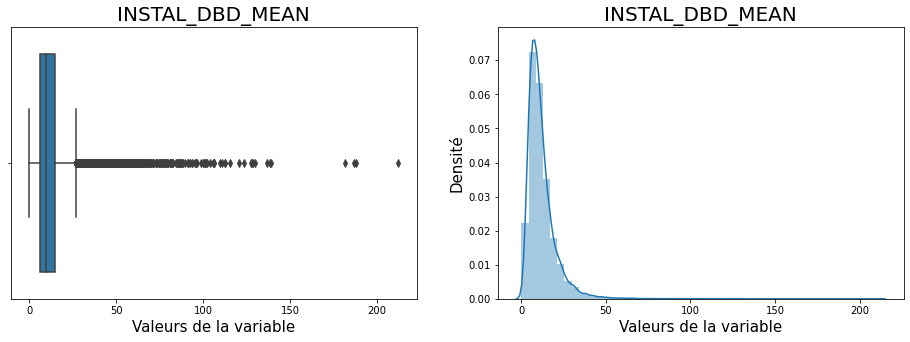

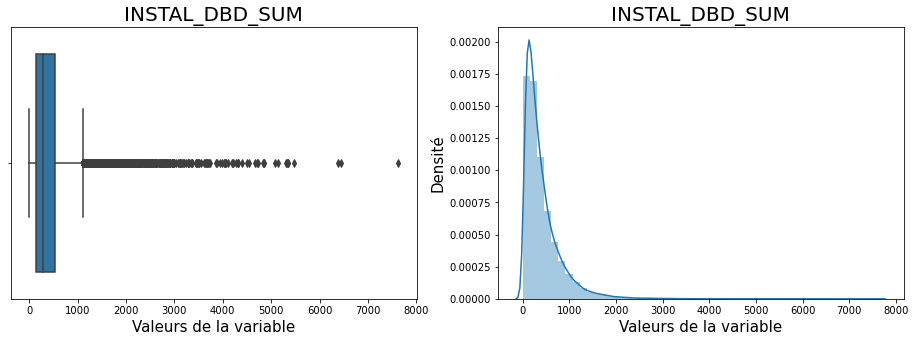

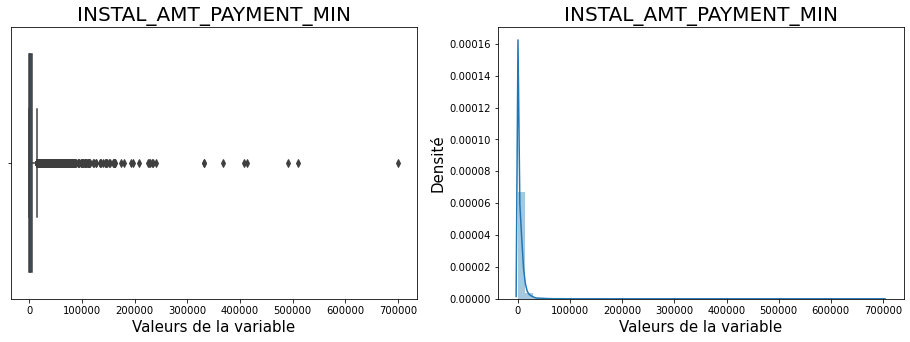

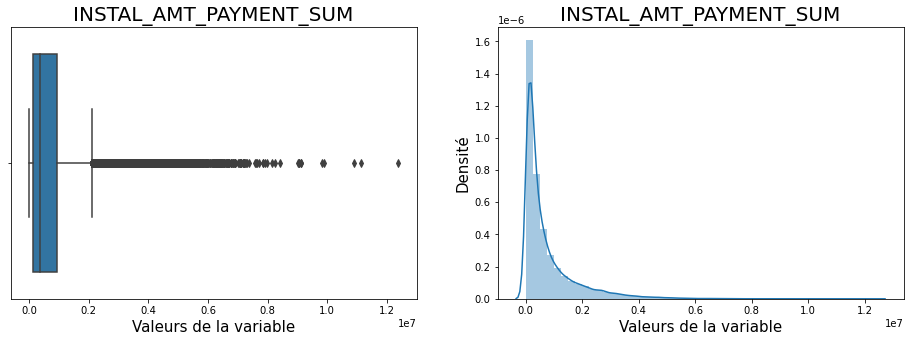

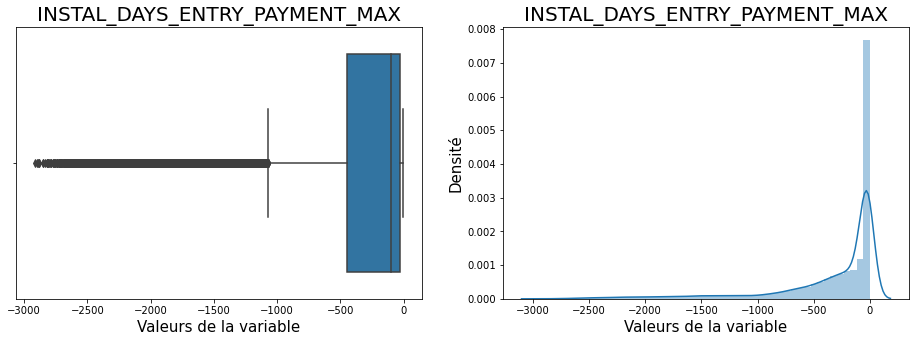

In [75]:
for col in df.columns:
    if col != 'TARGET':
        decrit_variable(df, col)

## Séparation en sous-ensemble d'entraînement et de test

In [77]:
df.shape

(46783, 39)

In [80]:
X = df.loc[:, df.columns != 'TARGET']
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [79]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37426, 38)
(9357, 38)
(37426,)
(9357,)


## Normalisation

In [85]:
std_scale_X = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale_X.transform(X_train)
X_test_std = std_scale_X.transform(X_test)